In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import optimizers
from tqdm import tqdm_notebook as tqdm

Using TensorFlow backend.


In [2]:
mnist = tf.keras.datasets.mnist
mnist_data = mnist.load_data()
mnist_data_train = np.array(mnist_data[0][0])
mnist_label_train = np.array(mnist_data[0][1])
mnist_data_test = np.array(mnist_data[1][0])
mnist_label_test = np.array(mnist_data[1][1])
print(mnist_data_train.shape)
print(mnist_label_train.shape)
print(mnist_data_test.shape)
print(mnist_label_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
print(f"Max value: {np.max(mnist_data_train)}")
print(f"Min value: {np.min(mnist_data_train)}")
print(f"Type: {mnist_data_train.dtype}")
height = mnist_data_train[0].shape[0]
width = mnist_data_train[0].shape[1]
print(f"Height: {height}, width: {width}")

Max value: 255
Min value: 0
Type: uint8
Height: 28, width: 28


In [4]:
num_inputs = height * width
num_train_data = mnist_data_train.shape[0]
print(f"Number of inputs: {num_inputs}")
print(f"number of training samples: {num_train_data}")

Number of inputs: 784
number of training samples: 60000


Text(0.5, 1.0, '5')

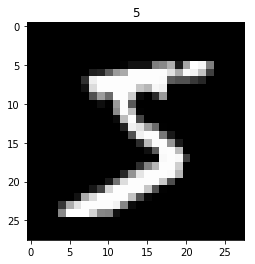

In [5]:
plt.imshow(mnist_data_train[0], cmap='gray')
plt.title(mnist_label_train[0])

In [6]:
inp = Input(shape=(num_inputs,), name="input")
h = Dense(units=1, activation='linear')(inp)
model = Model(inputs=inp, outputs=h)

model.compile(loss='mse', optimizer=optimizers.Adam(lr=1e-1))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [8]:
print(f"Original data shape: {mnist_data_train.shape}")
mnist_data_train_reshape = mnist_data_train.reshape(num_train_data, -1)
print(f"Data shape after reshaping to vector samples: {mnist_data_train_reshape.shape}")

Original data shape: (60000, 28, 28)
Data shape after reshaping to vector samples: (60000, 784)


In [9]:
epochs = 10

for i in tqdm(range(epochs)):
    hist = model.fit(mnist_data_train_reshape, mnist_label_train, verbose=True)

Epoch 1/1
60000/60000 [==============================] - 3s 50us/step - loss: 68026.4633
Epoch 1/1
60000/60000 [==============================] - 2s 35us/step - loss: 55250.8315
Epoch 1/1
60000/60000 [==============================] - 2s 35us/step - loss: 61484.4407
Epoch 1/1
60000/60000 [==============================] - 2s 37us/step - loss: 80990.6889
Epoch 1/1
60000/60000 [==============================] - 2s 37us/step - loss: 64844.2136
Epoch 1/1
60000/60000 [==============================] - 2s 37us/step - loss: 58336.6963
Epoch 1/1
60000/60000 [==============================] - 2s 36us/step - loss: 61475.8267
Epoch 1/1
60000/60000 [==============================] - 2s 36us/step - loss: 98094.2146
Epoch 1/1
60000/60000 [==============================] - 2s 35us/step - loss: 55149.1099
Epoch 1/1
60000/60000 [==============================] - 2s 38us/step - loss: 68997.0059



In [10]:
model.predict(mnist_data_train_reshape[0].reshape(1, -1))

array([[-36.70329]], dtype=float32)

In [11]:
num_test_data = mnist_data_test.shape[0]
mnist_data_test_reshape = mnist_data_test.reshape(num_test_data, -1)
print(f"Amount of test data: {num_test_data}")

predictions = model.predict(mnist_data_test_reshape)
print(predictions.shape)

Amount of test data: 10000
(10000, 1)


In [12]:
correct_predictions = 0
wrong_predictions = 0
for c, pred in enumerate(predictions):
    if pred[0] == mnist_label_test[c]:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print("")
total_predictions = correct_predictions + wrong_predictions
print(f"Total predictions: {total_predictions}")
print(f"Correct predictions: {correct_predictions}, {correct_predictions/total_predictions*100}%")
print(f"Wrong predictions: {wrong_predictions}, {wrong_predictions/total_predictions*100}%")


Total predictions: 10000
Correct predictions: 0, 0.0%
Wrong predictions: 10000, 100.0%
